In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler #scaling de los datos entre 0 y 1
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [2]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [3]:
#cargo primero los datos
file_dir = 'Datos/RiesgoBariloche'
data = pd.read_csv(file_dir,sep=",",usecols=["incidenciaAcum14d"],quotechar='"',na_values=[''])
df = pd.DataFrame(data)
df = df.to_numpy()
df1 = np.copy(df) #el original
df = df[:-20] #saco los ultimos 20 dias (ult 10 para probar + ult 10 retrasados)

In [4]:
#normalizacion
scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(df.reshape(-1,1))
#split en train y test
training_size=int(len(df)*0.8)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1] #train y test data
lag = 4 #creo que este es el que deducen en el paper
#creo los que vienen para la red
x_train, y_train = create_dataset(train_data, lag)
x_test, y_test = create_dataset(test_data, lag)

In [5]:
n_features = 1
n_seq = 2
n_steps = 2
x_train = x_train.reshape((x_train.shape[0], n_seq, 1, n_steps, n_features))
x_test = x_test.reshape((x_test.shape[0], n_seq, 1, n_steps, n_features))

In [6]:
model = keras.Sequential()
model.add(keras.layers.ConvLSTM2D(filters=64, kernel_size=(1,2), activation='relu', input_shape=(n_seq, 1, n_steps, n_features)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1))
model.compile(optimizer='adam',loss=keras.losses.MSE,metrics=['mse']) #metrics=['mean_absolute_percentage_error']
model.summary()
history = model.fit(x_train, y_train,epochs=500,validation_data=(x_test,y_test),batch_size=8,verbose=2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_1 (ConvLSTM2D)  (None, 1, 1, 64)          33536     
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 33,601
Trainable params: 33,601
Non-trainable params: 0
_________________________________________________________________
Train on 230 samples, validate on 54 samples
Epoch 1/500
 - 3s - loss: 0.0363 - mse: 0.0363 - val_loss: 0.4493 - val_mse: 0.4493
Epoch 2/500
 - 0s - loss: 0.0228 - mse: 0.0228 - val_loss: 0.3015 - val_mse: 0.3015
Epoch 3/500
 - 0s - loss: 0.0124 - mse: 0.0124 - val_loss: 0.1355 - val_mse: 0.1355
Epoch 4/500
 - 0s - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0338 - val_mse: 0.0338

Epoch 79/500
 - 0s - loss: 5.6290e-05 - mse: 5.6290e-05 - val_loss: 4.6602e-04 - val_mse: 4.6602e-04
Epoch 80/500
 - 0s - loss: 7.6513e-05 - mse: 7.6513e-05 - val_loss: 7.8719e-04 - val_mse: 7.8719e-04
Epoch 81/500
 - 0s - loss: 6.3063e-05 - mse: 6.3063e-05 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 82/500
 - 0s - loss: 5.5766e-05 - mse: 5.5766e-05 - val_loss: 6.2942e-04 - val_mse: 6.2942e-04
Epoch 83/500
 - 0s - loss: 4.9788e-05 - mse: 4.9788e-05 - val_loss: 4.9155e-04 - val_mse: 4.9155e-04
Epoch 84/500
 - 0s - loss: 4.8508e-05 - mse: 4.8508e-05 - val_loss: 6.4097e-04 - val_mse: 6.4097e-04
Epoch 85/500
 - 0s - loss: 4.6973e-05 - mse: 4.6973e-05 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 86/500
 - 0s - loss: 4.9449e-05 - mse: 4.9449e-05 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 87/500
 - 0s - loss: 8.1300e-05 - mse: 8.1300e-05 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 88/500
 - 0s - loss: 5.1822e-05 - mse: 5.1822e-05 - val_loss: 6.5349e-04 - val_mse: 6.5349e-04
Epoch 89/500
 - 0s - l

Epoch 163/500
 - 0s - loss: 3.8303e-05 - mse: 3.8303e-05 - val_loss: 5.4327e-04 - val_mse: 5.4327e-04
Epoch 164/500
 - 0s - loss: 3.7348e-05 - mse: 3.7348e-05 - val_loss: 3.5183e-04 - val_mse: 3.5183e-04
Epoch 165/500
 - 0s - loss: 3.6975e-05 - mse: 3.6975e-05 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 166/500
 - 0s - loss: 3.9223e-05 - mse: 3.9223e-05 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 167/500
 - 0s - loss: 4.6232e-05 - mse: 4.6232e-05 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 168/500
 - 0s - loss: 4.9408e-05 - mse: 4.9408e-05 - val_loss: 6.3936e-04 - val_mse: 6.3936e-04
Epoch 169/500
 - 0s - loss: 6.3692e-05 - mse: 6.3692e-05 - val_loss: 8.9168e-04 - val_mse: 8.9168e-04
Epoch 170/500
 - 0s - loss: 6.4180e-05 - mse: 6.4179e-05 - val_loss: 8.0596e-04 - val_mse: 8.0596e-04
Epoch 171/500
 - 0s - loss: 4.5586e-05 - mse: 4.5586e-05 - val_loss: 5.1737e-04 - val_mse: 5.1737e-04
Epoch 172/500
 - 0s - loss: 4.5676e-05 - mse: 4.5676e-05 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 173/50

Epoch 246/500
 - 0s - loss: 5.0736e-05 - mse: 5.0736e-05 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 247/500
 - 0s - loss: 5.1537e-05 - mse: 5.1537e-05 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 248/500
 - 0s - loss: 4.3388e-05 - mse: 4.3388e-05 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 249/500
 - 0s - loss: 4.1817e-05 - mse: 4.1817e-05 - val_loss: 4.8840e-04 - val_mse: 4.8840e-04
Epoch 250/500
 - 0s - loss: 3.7082e-05 - mse: 3.7082e-05 - val_loss: 9.3695e-04 - val_mse: 9.3695e-04
Epoch 251/500
 - 0s - loss: 4.3178e-05 - mse: 4.3178e-05 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 252/500
 - 0s - loss: 4.2497e-05 - mse: 4.2497e-05 - val_loss: 5.1072e-04 - val_mse: 5.1072e-04
Epoch 253/500
 - 0s - loss: 4.2477e-05 - mse: 4.2477e-05 - val_loss: 7.9109e-04 - val_mse: 7.9109e-04
Epoch 254/500
 - 0s - loss: 3.7181e-05 - mse: 3.7181e-05 - val_loss: 9.7286e-04 - val_mse: 9.7286e-04
Epoch 255/500
 - 0s - loss: 4.6016e-05 - mse: 4.6016e-05 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 256/500
 - 0s 

Epoch 329/500
 - 0s - loss: 3.7140e-05 - mse: 3.7140e-05 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 330/500
 - 0s - loss: 3.7420e-05 - mse: 3.7420e-05 - val_loss: 6.4230e-04 - val_mse: 6.4230e-04
Epoch 331/500
 - 0s - loss: 4.1678e-05 - mse: 4.1678e-05 - val_loss: 5.5171e-04 - val_mse: 5.5171e-04
Epoch 332/500
 - 0s - loss: 2.9210e-05 - mse: 2.9210e-05 - val_loss: 6.0810e-04 - val_mse: 6.0810e-04
Epoch 333/500
 - 0s - loss: 3.3105e-05 - mse: 3.3105e-05 - val_loss: 6.3556e-04 - val_mse: 6.3556e-04
Epoch 334/500
 - 0s - loss: 5.5057e-05 - mse: 5.5057e-05 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 335/500
 - 0s - loss: 6.1261e-05 - mse: 6.1261e-05 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 336/500
 - 0s - loss: 3.1608e-05 - mse: 3.1608e-05 - val_loss: 7.5696e-04 - val_mse: 7.5696e-04
Epoch 337/500
 - 0s - loss: 3.2700e-05 - mse: 3.2700e-05 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 338/500
 - 0s - loss: 2.8655e-05 - mse: 2.8655e-05 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 339/500
 - 0s 

Epoch 413/500
 - 0s - loss: 3.4124e-05 - mse: 3.4124e-05 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 414/500
 - 0s - loss: 2.6374e-05 - mse: 2.6374e-05 - val_loss: 6.3250e-04 - val_mse: 6.3250e-04
Epoch 415/500
 - 0s - loss: 3.1818e-05 - mse: 3.1818e-05 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 416/500
 - 0s - loss: 4.1027e-05 - mse: 4.1027e-05 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 417/500
 - 0s - loss: 3.5076e-05 - mse: 3.5076e-05 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 418/500
 - 0s - loss: 2.6149e-05 - mse: 2.6149e-05 - val_loss: 3.9742e-04 - val_mse: 3.9742e-04
Epoch 419/500
 - 0s - loss: 3.6621e-05 - mse: 3.6621e-05 - val_loss: 8.0109e-04 - val_mse: 8.0109e-04
Epoch 420/500
 - 0s - loss: 3.9118e-05 - mse: 3.9118e-05 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 421/500
 - 0s - loss: 3.3346e-05 - mse: 3.3346e-05 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 422/500
 - 0s - loss: 4.0142e-05 - mse: 4.0142e-05 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 423/500
 - 0s - loss: 3.2429e-

Epoch 496/500
 - 0s - loss: 6.5693e-05 - mse: 6.5693e-05 - val_loss: 4.7197e-04 - val_mse: 4.7197e-04
Epoch 497/500
 - 0s - loss: 5.3026e-05 - mse: 5.3026e-05 - val_loss: 5.7188e-04 - val_mse: 5.7188e-04
Epoch 498/500
 - 0s - loss: 4.2510e-05 - mse: 4.2510e-05 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 499/500
 - 0s - loss: 3.0748e-05 - mse: 3.0748e-05 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 500/500
 - 0s - loss: 3.9492e-05 - mse: 3.9492e-05 - val_loss: 0.0017 - val_mse: 0.0017


In [7]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [8]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [9]:
print('train mse squared:',np.sqrt(mean_squared_error(y_train,train_predict)))
print('test mse squared:',np.sqrt(mean_squared_error(y_test,test_predict))) 

train mse squared: 107.37593018332953
test mse squared: 393.0666100105359


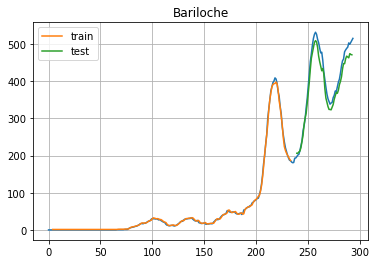

In [10]:
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lag:len(train_predict)+lag, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(lag*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot,label='train')
plt.plot(testPredictPlot,label='test')
plt.grid()
plt.title('Bariloche')
plt.legend()
plt.show()

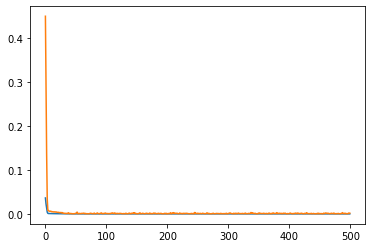

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# aca hacemos el forecast

In [19]:
n = len(test_data)
n_steps = 2
x_input=test_data[n-lag:].reshape(1,-1)
x_input = x_input.flatten()
x_input = x_input.reshape((1, n_seq, 1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[0.910192]]


In [ ]:
plt.plot(df1)
dias_forecast = np.arange(0,20) + len(df) - 1
plt.plot(dias_forecast,scaler.inverse_transform(lst_output))